In [161]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Conv2D , AveragePooling2D , Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist # for loading the dataset
from tensorflow.keras.utils import to_categorical 
import matplotlib.pyplot as plt # for plotting the images
import os, time

In [180]:
import sys, matplotlib
print ("Python version: ", sys.version)
print("Tensorflow version: ", tf.__version__)
print("Numpy version: ", np.__version__)
print("Matplotlib version: ", matplotlib.__version__)

Python version:  3.6.5 |Anaconda, Inc.| (default, Mar 29 2018, 13:32:41) [MSC v.1900 64 bit (AMD64)]
Tensorflow version:  2.4.0
Numpy version:  1.19.5
Matplotlib version:  3.1.0


In [162]:
(x_train , y_train) ,( x_test, y_test) = mnist.load_data()

In [163]:
#data preprocessing
x_train = np.pad(x_train,((0,0),(2,2),(2,2))) #padding from 28*28 to 32*32
x_test = np.pad(x_test,((0,0),(2,2),(2,2)))
x_train = x_train/255.0 # Normalizing the values from 0-255 to 0-1
x_test = x_test/255.0
y_train=to_categorical(y_train,10) # converting labels into one-hot, easier for classification
y_test=to_categorical(y_test,10)

In [164]:
print("Training set size: {}, with dimension {} * {}".format(x_train.shape[0], x_train.shape[1], x_train.shape[2]))
print("Test set size: {}, with dimension {} * {}".format(x_test.shape[0], x_test.shape[1], x_test.shape[2]))

Training set size: 60000, with dimension 32 * 32
Test set size: 10000, with dimension 32 * 32


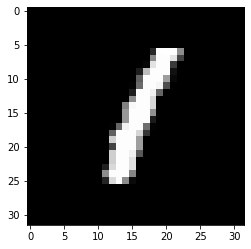

Answer: 1


In [165]:
example = 105
plt.imshow(x_train[example],cmap='gray')
plt.show()
print("Answer: {}".format(np.where(y_train[example] == 1)[0][0]))

In [166]:
x_train_3d=np.expand_dims(x_train,3) #expand dimension from 32*32 to 32*32*1
x_test_3d=np.expand_dims(x_test,3)

In [167]:
#build the cnn LeNet-5 architecture
cnn = Sequential(name="LeNet-5")
# Convolution Layer1
cnn.add(Conv2D(6,(5,5),strides=(1,1), activation='tanh',input_shape=(32, 32, 1), name='C1')) # C1
# Average Subsampling
cnn.add(AveragePooling2D(name='S2'))# S2
# Convolution Layer2
cnn.add(Conv2D(16,(5,5),strides=(1,1),activation='tanh',name='C3')) #C3
# Average Subsampling
cnn.add(AveragePooling2D(name='S4')) #S4
# Flatten Layer
cnn.add(Flatten()) #transform its input to a 1-dimensional array
#Fully Connected Layer
cnn.add(Dense(120,activation='tanh',name='FC5')) #FC5
cnn.add(Dense(84,activation='tanh',name='FC6')) #FC6
cnn.add(Dense(10,activation='softmax',name='Output')) #FC7

In [168]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [169]:
print(cnn.summary())

Model: "LeNet-5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
C1 (Conv2D)                  (None, 28, 28, 6)         156       
_________________________________________________________________
S2 (AveragePooling2D)        (None, 14, 14, 6)         0         
_________________________________________________________________
C3 (Conv2D)                  (None, 10, 10, 16)        2416      
_________________________________________________________________
S4 (AveragePooling2D)        (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 400)               0         
_________________________________________________________________
FC5 (Dense)                  (None, 120)               48120     
_________________________________________________________________
FC6 (Dense)                  (None, 84)                1016

In [170]:
root_logdir = os.path.join(os.curdir, "logs\\fit\\")

def get_run_logdir():
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)

In [171]:
cnn.fit(x_train_3d,y_train,epochs=10, batch_size=32, validation_data=(x_test_3d, y_test), callbacks=[tensorboard_cb])

Epoch 1/10
1875/1875 [==============================] - 45s 23ms/step - loss: 0.4145 - accuracy: 0.8769 - val_loss: 0.1073 - val_accuracy: 0.9669
Epoch 2/10
1875/1875 [==============================] - 40s 22ms/step - loss: 0.0974 - accuracy: 0.9697 - val_loss: 0.0753 - val_accuracy: 0.9771
Epoch 3/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0626 - accuracy: 0.9801 - val_loss: 0.0673 - val_accuracy: 0.9783
Epoch 4/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0457 - accuracy: 0.9853 - val_loss: 0.0526 - val_accuracy: 0.9817
Epoch 5/10
1875/1875 [==============================] - 38s 21ms/step - loss: 0.0357 - accuracy: 0.9883 - val_loss: 0.0515 - val_accuracy: 0.9841
Epoch 6/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0292 - accuracy: 0.9906 - val_loss: 0.0555 - val_accuracy: 0.9819
Epoch 7/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0249 - accuracy: 0.9913 - val_loss: 0.0567 -

In [172]:
_,acc=cnn.evaluate(x_test_3d,y_test)
print("Test Accuracy: ", acc)

313/313 [==============================] - 3s 9ms/step - loss: 0.0542 - accuracy: 0.9851
Test Accuracy:  0.9850999712944031


In [173]:
predictions = cnn.predict(x_test_3d)

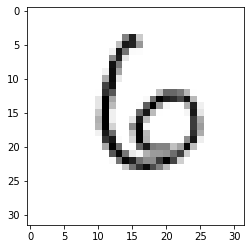

Test Answer:  6
Real Answer:  6


In [174]:
test_result = 100
plt.imshow(x_test[test_result],cmap=plt.cm.binary)
plt.show()
print("Test Answer: ", np.argmax(predictions[test_result]))
print("Real Answer: ", np.where(y_test[test_result] == 1)[0][0])